In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
train = pd. read_csv('train_ctrUa4K.csv')
test =  pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize = True)  #Normalize can be set  to True to print proportions instead of numbers

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

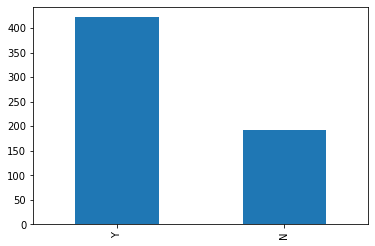

In [10]:
train['Loan_Status'].value_counts().plot.bar() # for plot the graph 

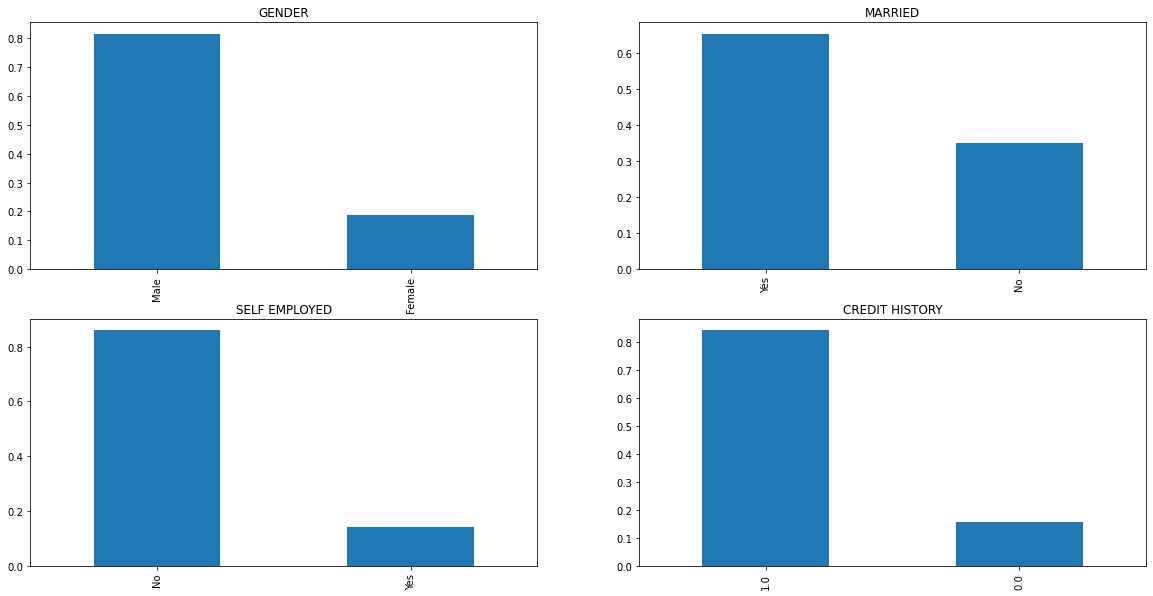

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize =True).plot.bar(figsize = (20,10),title = 'GENDER')
plt.subplot(222)
train['Married'].value_counts(normalize =True).plot.bar(figsize = (20,10), title = 'MARRIED')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize =True).plot.bar(title = 'SELF EMPLOYED')
plt.subplot(224)
train['Credit_History'].value_counts(normalize =True).plot.bar(title = 'CREDIT HISTORY')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

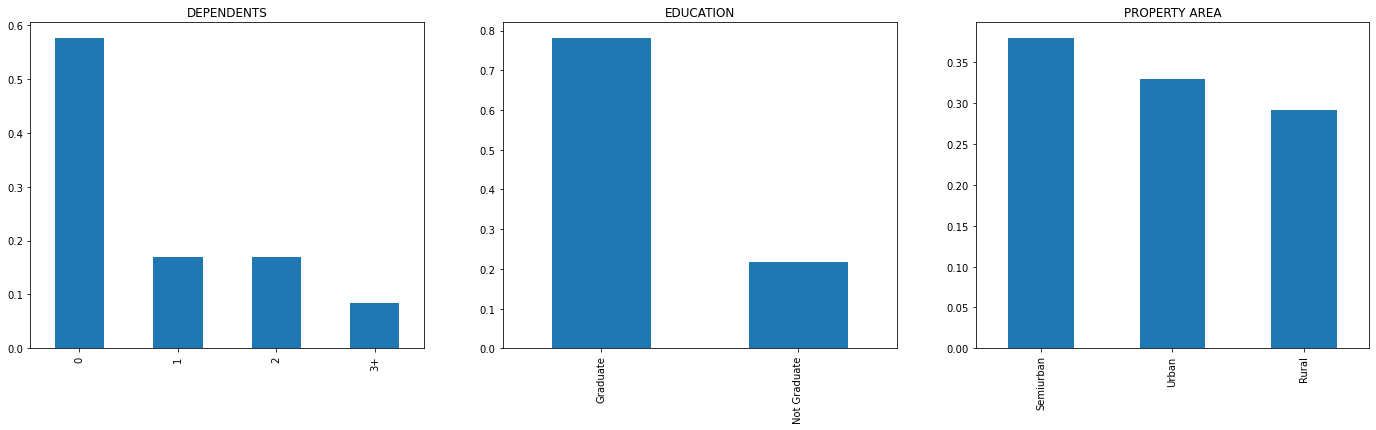

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize =True).plot.bar(figsize = (24,6),title = 'DEPENDENTS')
plt.subplot(132)
train['Education'].value_counts(normalize =True).plot.bar(figsize = (24,6),title = 'EDUCATION')
plt.subplot(133)
train['Property_Area'].value_counts(normalize =True).plot.bar(figsize = (24,6),title = 'PROPERTY AREA')
plt.show

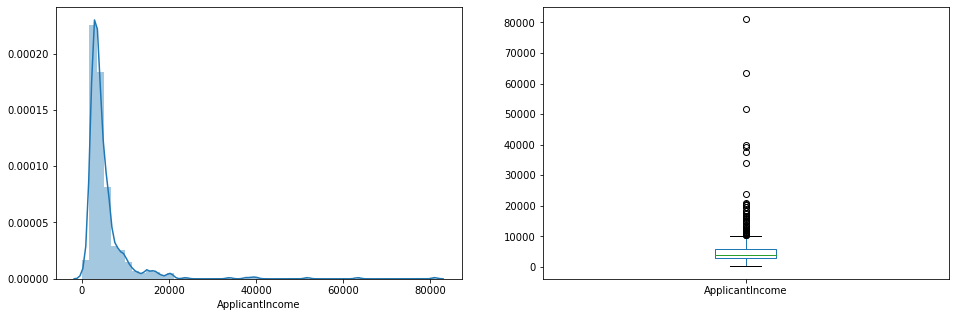

In [13]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize =(16,5))
plt.show()

Text(0.5, 0.98, ' ')

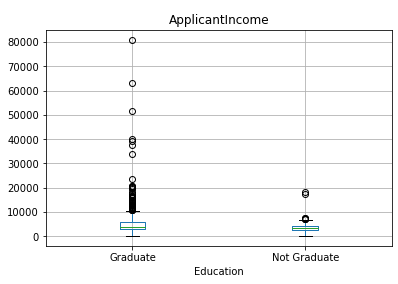

In [14]:
train.boxplot(column = 'ApplicantIncome' , by ='Education')
plt.suptitle(" ")
#Text(0.5,0.98,'')

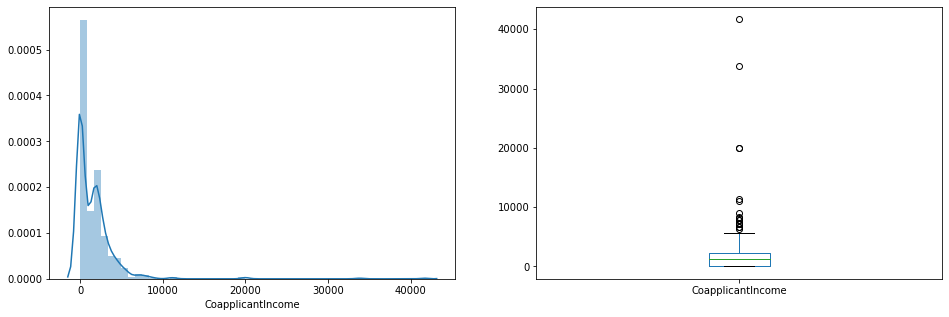

In [15]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize =(16,5))
plt.show()

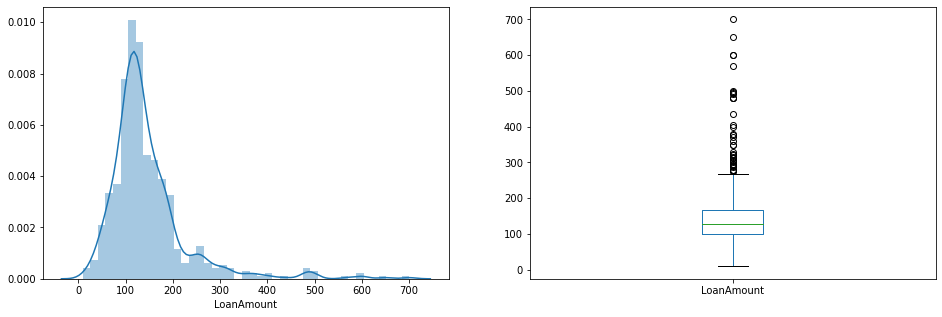

In [16]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize =(16,5))
plt.show()

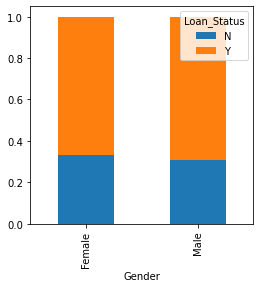

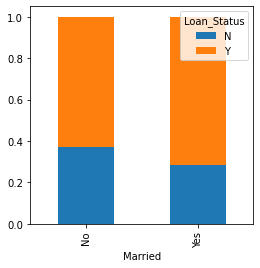

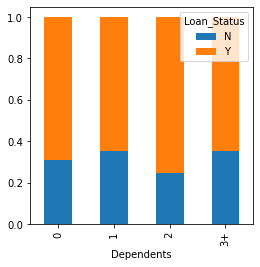

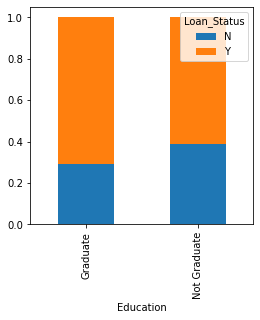

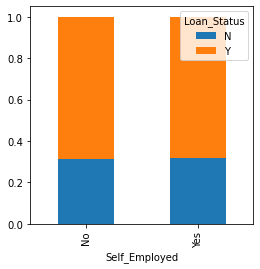

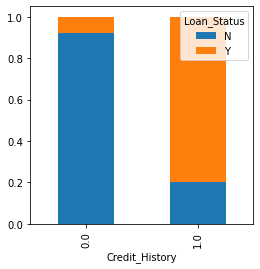

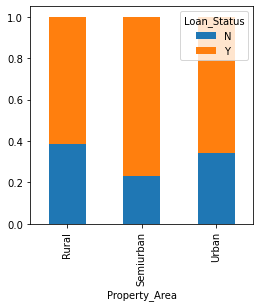

In [17]:
# we are doing the bivariate analysis means comparing  the variables with target variable 
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))


Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True, figsize =(4,4))

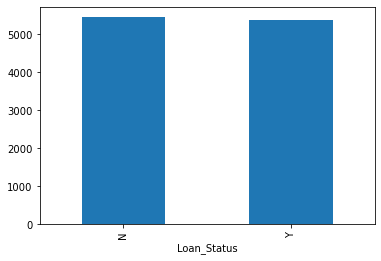

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

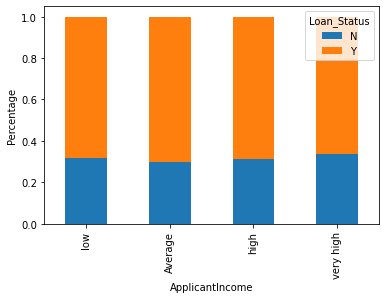

In [19]:
bins = [0,2500,4000,6000,81000]
group = ['low','Average','high','very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

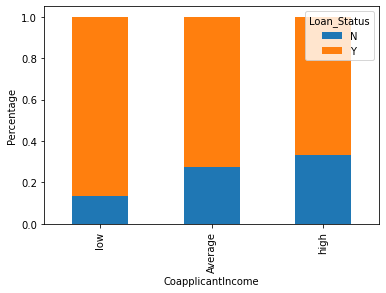

In [20]:
bins = [0,1000,3000,42000]
group = ['low','Average','high']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)
Coapplicant_Income_bin  = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

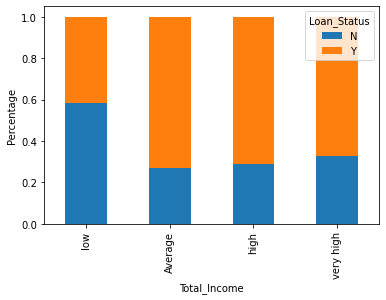

In [21]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['low','Average','high','very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

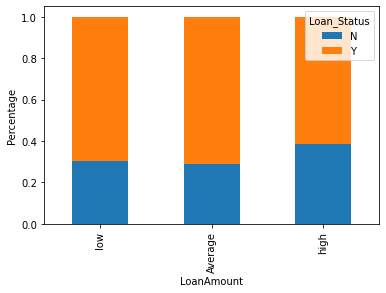

In [22]:
bins = [0,100,200,700]
group = ['low','Average','high',]
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis = 0).plot(kind ="bar",stacked = True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [23]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis = 1)
train['Dependents'].replace('3+', 3 , inplace = True)
test['Dependents'].replace('3+', 3 , inplace = True)
train['Loan_Status'].replace('N', 0 , inplace = True)
train['Loan_Status'].replace('Y', 1 , inplace = True)

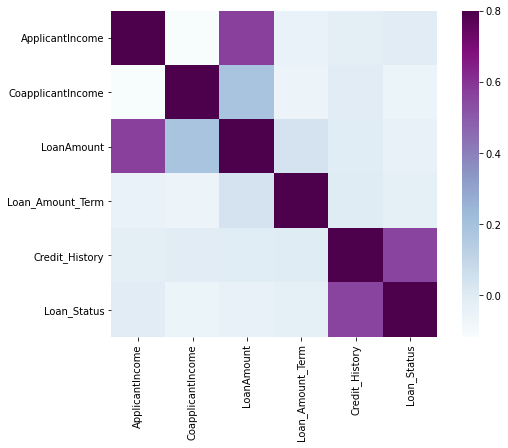

In [24]:
matrix = train.corr() 
ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix,vmax =.8, square = True, cmap = "BuPu")

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [29]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
test['Married'].fillna(train['Married'].mode()[0], inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

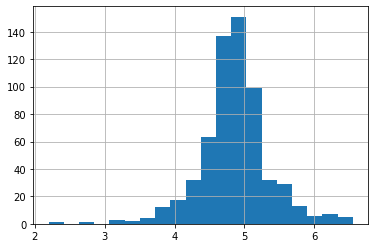

In [31]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [32]:
train=train.drop('Loan_ID',axis =1)
test=test.drop('Loan_ID',axis =1)

In [33]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [34]:
x= pd.get_dummies(x)
train = pd.get_dummies(train)
test  = pd.get_dummies(test)

In [35]:
from sklearn.model_selection import train_test_split

# splitting is done here( into training part and validation part)
x_train , x_cv , y_train , y_cv = train_test_split(x,y,test_size = 0.3)

In [36]:
# we are importing reqiured libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#here we are going create a LogisticRegresstion model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C =1.0, class_weight = None, dual =False,fit_intercept =True,  intercept_scaling = 1, max_iter = 100,
                    multi_class = 'ovr', n_jobs = 1,  penalty ='12', random_state = 1,solver='liblinear' ,tol = 0.0001, verbose = 0, warm_start = False)
# c represents the strenght of regularization( which in it increases the parameter value to dece the overfitting)
# if c is small more stronger the regularization

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [37]:
# now predict the loan status and calculating the accuracy score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8216216216216217

In [38]:
pred_test = model.predict(test)
# now we have to do submissions to sample(av)
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status'].replace(0,'N', inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)
pd.DataFrame(submission, columns  = ['Loan_ID','Loan_Status']).to_csv('logistics.csv')

In [39]:
from sklearn.model_selection import StratifiedKFold
i = 1
kf = StratifiedKFold(n_splits = 5,random_state = 1,shuffle =True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kflod {}'.format(i,kf.n_splits))
    xtr,xvl= x.iloc[train_index],x.iloc[test_index]
    ytr,yvl= y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score  = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test= model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kflod 5
accuracy_score 0.8048780487804879

2 of kflod 5
accuracy_score 0.8373983739837398

3 of kflod 5
accuracy_score 0.7804878048780488

4 of kflod 5
accuracy_score 0.7886178861788617

5 of kflod 5
accuracy_score 0.7950819672131147


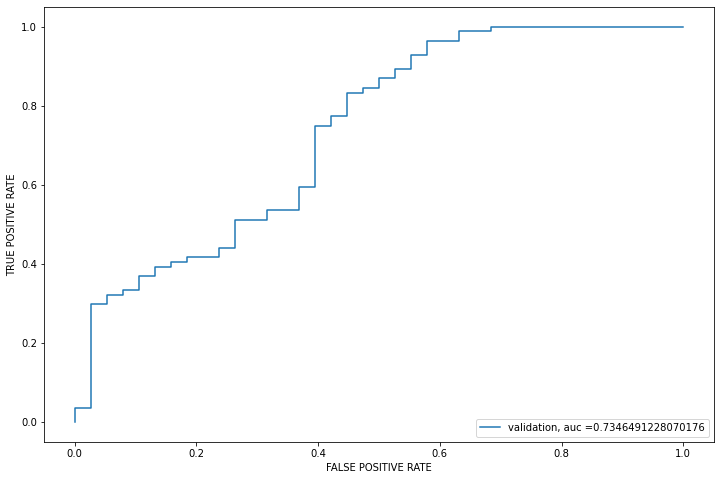

In [40]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc ="+str(auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc =4)
plt.show()

In [41]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N', inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)
pd.DataFrame(submission, columns  = ['Loan_ID','Loan_Status']).to_csv('logistics.csv')

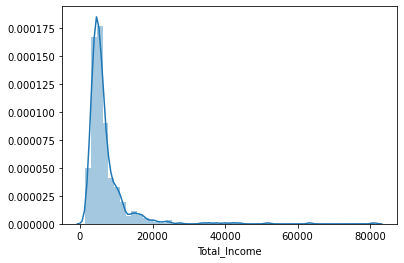

In [42]:
train['Total_Income'] =train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] =test['ApplicantIncome']+test['CoapplicantIncome']
sns.distplot(train['Total_Income']);

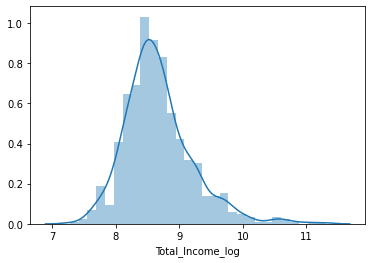

In [43]:
train['Total_Income_log'] =np.log(train['Total_Income'])

test['Total_Income_log'] =np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log']);

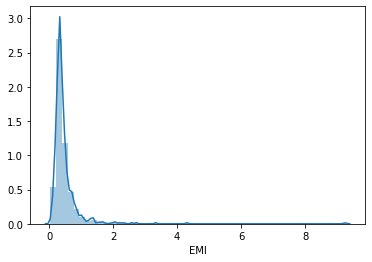

In [44]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

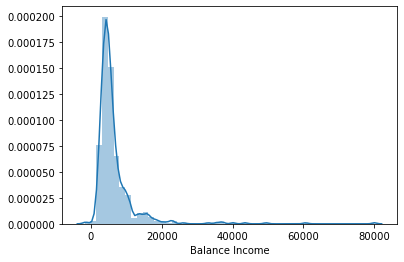

In [45]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)#Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [46]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis= 1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis= 1)

In [49]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [52]:
i =1
kf = StratifiedKFold(n_splits =5, random_state = 1,shuffle = True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy_score 0.7950819672131147

2 of kfold5
accuracy_score 0.7950819672131147

3 of kfold5
accuracy_score 0.7950819672131147

4 of kfold5
accuracy_score 0.7950819672131147

5 of kfold5
accuracy_score 0.7950819672131147
